<a href="https://colab.research.google.com/github/domywillygithub/MyProjects/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) on Medium Data collected between Jan-Mar 2023
Medium is an American online publishing platform developed by Evan Williams and launched in August 2012. It is owned by A Medium Corporation.The platform is an example of social journalism, having a hybrid collection of amateur and professional people and publications, or exclusive blogs or publishers on Medium, and is regularly regarded as a blog host.

To learn more about medium please visit their official website at https://medium.com/

# Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import statsmodels.api as sm
from nltk.corpus import stopwords
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Data set can be found [here](https://drive.proton.me/urls/EECMYNN884#cnownEl6sZwC)

In [ ]:
df = pd.read_csv('/content/medium_data.csv')
df

,id,url,title,subtitle,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/not-all-rainbow...,Not All Rainbows and Sunshine: The Darker Side...,Part 1: The Risks and Ethical Issues…,453.0,11,9,Towards Data Science,27-01-2023
1,2,https://towardsdatascience.com/ethics-in-ai-po...,Ethics in AI: Potential Root Causes for Biased...,An alternative approach to understanding bias ...,311.0,3,12,Towards Data Science,27-01-2023
2,3,https://towardsdatascience.com/python-tuple-th...,"Python Tuple, The Whole Truth and Only the Tru...",NaN,188.0,0,24,Towards Data Science,27-01-2023
3,4,https://towardsdatascience.com/dates-and-subqu...,Dates and Subqueries in SQL,Working with dates in SQL,15.0,1,4,Towards Data Science,27-01-2023
4,5,https://towardsdatascience.com/temporal-differ...,Temporal Differences with Python: First Sample...,NaN,10.0,0,13,Towards Data Science,27-01-2023
...,...,...,...,...,...,...,...,...,...
2493,2494,https://medium.com/swlh/brian-chesky-is-an-exa...,Brian Chesky is an Example of What it Means to...,NaN,370.0,2,7,The Startup,29-01-2023
2494,2495,https://medium.com/swlh/5-red-flags-of-online-...,5 Red Flags of Online Business Gurus,How to know which mentors you can’t trust onli...,250.0,6,8,The Startup,29-01-2023
2495,2496,https://writingcooperative.com/recognizing-the...,Recognizing These Three Realities Can Help Set...,NaN,410.0,10,4,The Writing Cooperative,29-01-2023
2496,2497,https://writingcooperative.com/i-remember-it-l...,“I Remember It Like It Was Just Yesterday…” Re...,The Role of Emotional Memory in Our Writing,461.0,7,7,The Writing Cooperative,29-01-2023


#2.Data Cleaning: 
##Check for missing values, duplicates, and incorrect data types.

In [ ]:
# check data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2498 non-null   int64  
 1   url           2498 non-null   object 
 2   title         2498 non-null   object 
 3   subtitle      2073 non-null   object 
 4   claps         2423 non-null   float64
 5   responses     2498 non-null   int64  
 6   reading_time  2498 non-null   int64  
 7   publication   2498 non-null   object 
 8   date          2498 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 175.8+ KB
None


In [ ]:
#check how many missing values are in the data frame
print(df.isnull().sum())

id                0
url               0
title             0
subtitle        425
claps            75
responses         0
reading_time      0
publication       0
date              0
dtype: int64


In [ ]:
# check for duplicates and delete them
print(df.duplicated().sum())
# remove duplicates
#df.drop_duplicates(inplace=True)

0


In [ ]:
# check for incorrect values in reading_time and claps columns
print(df[df['reading_time'] < 0])
print(df[df['claps'] < 0])

Empty DataFrame
Columns: [id, url, title, subtitle, claps, responses, reading_time, publication, date]
Index: []
Empty DataFrame
Columns: [id, url, title, subtitle, claps, responses, reading_time, publication, date]
Index: []


#2. Data Distribution: 
##Analyze the distribution of each column to understand the data range, outliers, and skewness.

In [ ]:
#checking the date column
df['date'].value_counts()

04-01-2023    80
24-01-2023    80
17-01-2023    78
01-03-2023    76
07-03-2023    70
              ..
05-03-2023    12
25-03-2023    12
30-03-2023    12
19-03-2023    11
28-01-2023    10
Name: date, Length: 70, dtype: int64

In [ ]:
df['publication'].value_counts()

Towards Data Science       1228
The Startup                 521
The Writing Cooperative     389
UX Collective               360
Name: publication, dtype: int64

reading_time is defined as the average reading speed of an adult (roughly 265 WPM-words per minute). We take the total word count of a post and translate it into minutes, with an adjustment made for images. 

below is the arrangements of articles based on reading_time in descending order

In [ ]:
df[['title','publication','claps','reading_time']].sort_values(by='reading_time', ascending=False)

,title,publication,claps,reading_time
1177,Learning from Machine Learning | Maarten Groot...,Towards Data Science,106.0,43
2376,Image Registration for Medical Datasets,Towards Data Science,20.0,31
1098,Image Registration for Medical Datasets,Towards Data Science,20.0,31
1479,"Specialized LLMs: ChatGPT, LaMDA, Galactica, C...",Towards Data Science,81.0,30
2123,"Build a back-end with PostgreSQL, FastAPI, and...",Towards Data Science,28.0,28
...,...,...,...,...
2302,Re-opening my weekly design mentorship session...,UX Collective,376.0,2
469,Author Terms and Conditions of Use,Towards Data Science,28.0,1
1926,Privacy Policy,Towards Data Science,25.0,1
1925,Author Terms and Conditions of Use,Towards Data Science,28.0,1


Claps are Medium's chosen metric, to measure reader support of an article (AKA Applause). Readers can clap up to 50 times per post. 

below's an arrangement of articles based on number of claps in descending order

In [ ]:
df[['title','publication','claps','reading_time']].sort_values(by='claps', ascending=False)

,title,publication,claps,reading_time
1167,How I Write 2 Articles Most Mornings Before Wo...,The Startup,11100.0,4
418,How ChatGPT Works: The Model Behind The Bot,Towards Data Science,7100.0,8
338,I Got Fired From My 9–5 For Having a Medium Ac...,The Startup,6800.0,4
898,"How I Write 480,000 Words a Month and Never Ru...",The Writing Cooperative,6300.0,6
713,What Makes Me Skip Your Story,The Writing Cooperative,5400.0,7
...,...,...,...,...
2287,Sentence Transformers: Meanings in Disguise,Towards Data Science,NaN,12
2398,Four Lessons Learned From a Decade and a Half ...,The Writing Cooperative,NaN,6
2446,UMAP Variance Explained,Towards Data Science,NaN,19
2476,I’m Tired of Inferior Writers Getting All the ...,The Writing Cooperative,NaN,6


Response is the way to show that a story or list speaks to you, you can leave a response for the author and other readers to see. 

Lets see which articles received the most responses

In [ ]:
df[['title','publication','claps','reading_time', 'responses']].sort_values(by='responses', ascending=False)

,title,publication,claps,reading_time,responses
1167,How I Write 2 Articles Most Mornings Before Wo...,The Startup,11100.0,4,207
870,ChatGPT Is Massively Overhyped. It’s Time We A...,The Startup,5000.0,4,150
2110,ChatGPT Is Massively Overhyped. It’s Time We A...,The Startup,5000.0,4,150
418,How ChatGPT Works: The Model Behind The Bot,Towards Data Science,7100.0,8,130
338,I Got Fired From My 9–5 For Having a Medium Ac...,The Startup,6800.0,4,123
...,...,...,...,...,...
869,The computer screen is the retina of the mind’...,UX Collective,35.0,8,0
479,9 Practical Challenges With Part-Time Writing ...,The Startup,15.0,5,0
1439,Having Too Many Ideas Can Be As Big a Problem ...,The Writing Cooperative,NaN,7,0
470,Privacy Policy,Towards Data Science,25.0,1,0


In [ ]:
# generate summary statistics for only numerical values with the exception of id ofcourse 
print(df.drop('id', axis=1).describe())

              claps    responses  reading_time
count   2423.000000  2498.000000   2498.000000
mean     367.353281     5.544035      7.479984
std      678.886988    12.793039      3.699977
min        0.000000     0.000000      1.000000
25%       62.000000     0.000000      5.000000
50%      155.000000     2.000000      7.000000
75%      381.500000     5.000000      9.000000
max    11100.000000   207.000000     43.000000


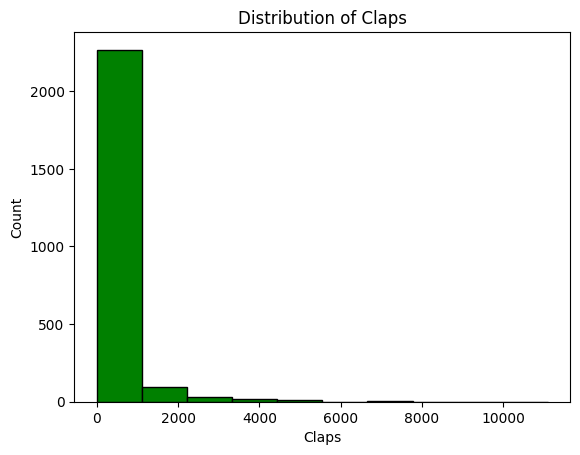

In [ ]:
# create histogram of claps column
plt.hist(df['claps'],bins=10, ec = 'black', color = 'green')
plt.title('Distribution of Claps')
plt.xlabel('Claps')
plt.ylabel('Count')
plt.show()
#looks like not so many articles that receive a lot of claps

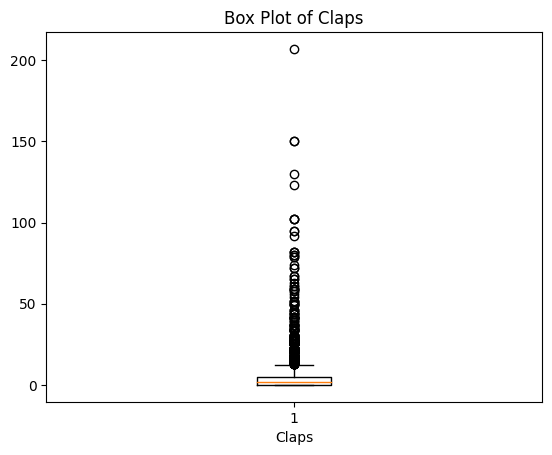

In [ ]:
# create box plot of claps column
plt.boxplot(df['responses'])
plt.title('Box Plot of Claps')
plt.xlabel('Claps')
plt.show()
#we can see most of the data are just outliers therefore not a great one

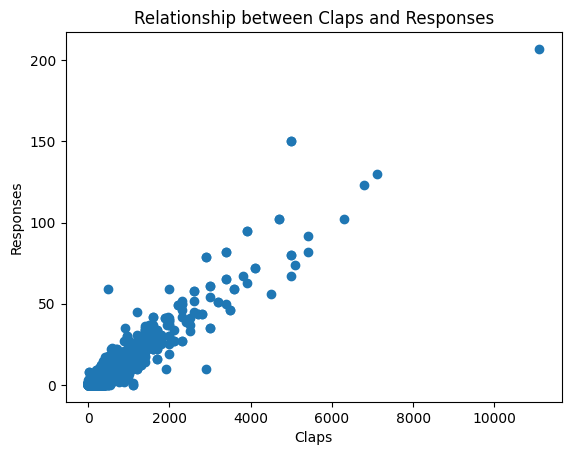

In [ ]:
# create scatter plot of claps and responses columns
plt.scatter(df['claps'], df['responses'])
plt.title('Relationship between Claps and Responses')
plt.xlabel('Claps')
plt.ylabel('Responses')
plt.show()
# There is a linear relation between claps and responses

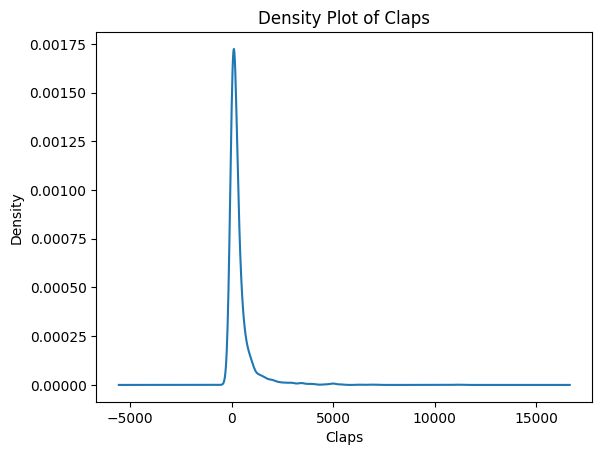

In [ ]:
# create density plot of claps column
df['claps'].plot(kind='density')
plt.title('Density Plot of Claps')
plt.xlabel('Claps')
plt.show()

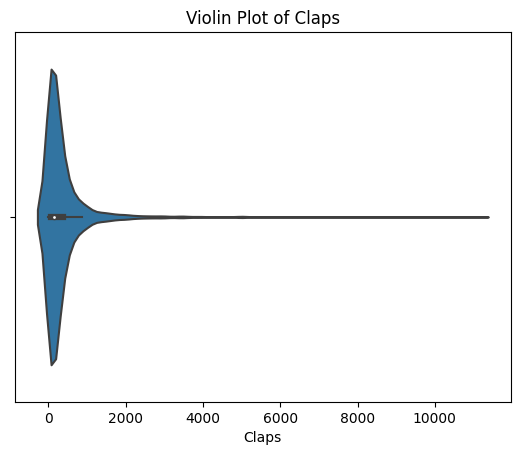

In [ ]:
# create violin plot of claps column
sns.violinplot(x=df['claps'])
plt.title('Violin Plot of Claps')
plt.xlabel('Claps')
plt.show()

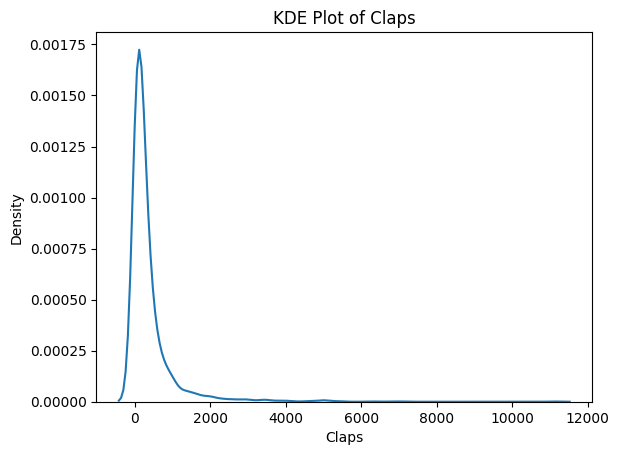

In [ ]:
# create KDE plot of claps column
sns.kdeplot(x=df['claps'])
plt.title('KDE Plot of Claps')
plt.xlabel('Claps')
plt.show()

# 3. Correlation Analysis: 

## Examine the relationship between different columns using correlation matrices, scatter plots, or heat maps.

In [ ]:
corr = df.drop('id', axis=1).corr()
print(corr)

                 claps  responses  reading_time
claps         1.000000   0.944147     -0.134700
responses     0.944147   1.000000     -0.129232
reading_time -0.134700  -0.129232      1.000000


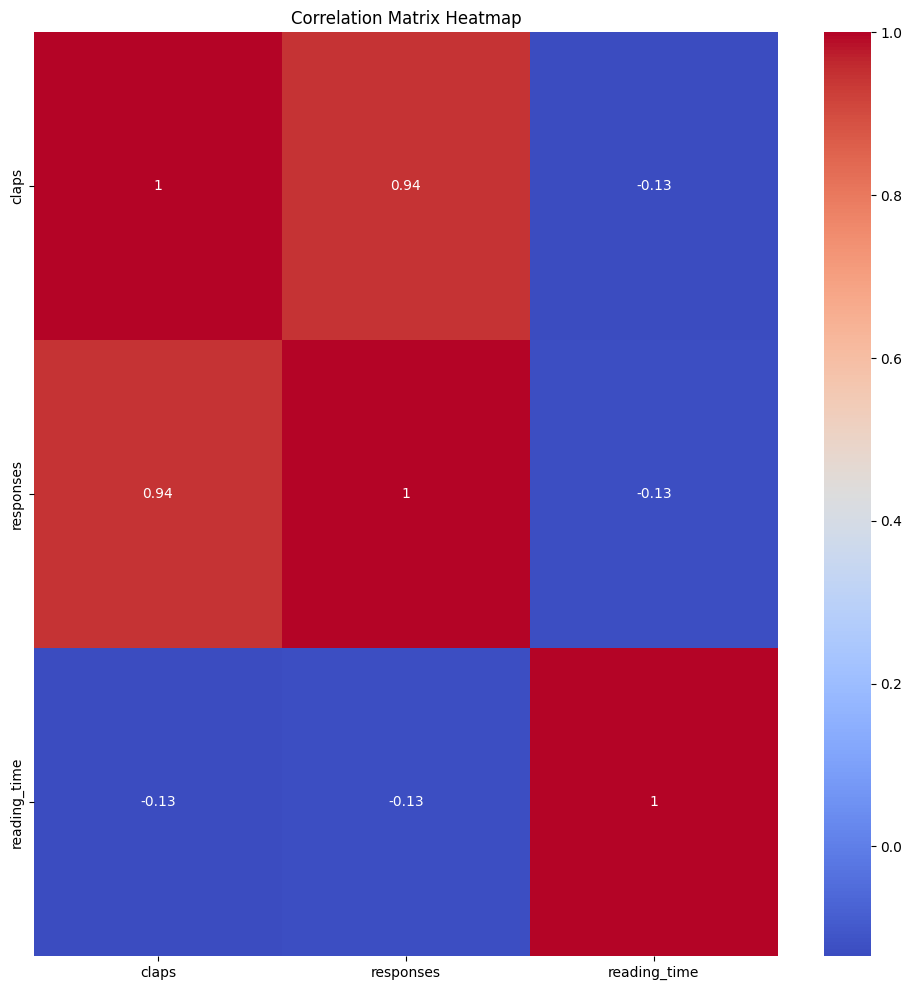

In [ ]:
# create heatmap of correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# sorting the dataframe by date
df = df.sort_values(by='date')
df

,id,url,title,subtitle,claps,responses,reading_time,publication,date
826,827,https://towardsdatascience.com/graph-ml-in-202...,Graph ML in 2023: The State of Affairs,Hot trends and major…,842.0,4,26,Towards Data Science,01-01-2023
840,841,https://writingcooperative.com/4-ways-in-which...,4 Ways In Which Returning To Writing After Bre...,Pauses — circumstantial or deliberate…,224.0,1,5,The Writing Cooperative,01-01-2023
839,840,https://writingcooperative.com/when-the-writer...,When The Writers You Don’t Admire Get You Down,"It’s all too easy to become resentful, but don’t",151.0,1,7,The Writing Cooperative,01-01-2023
838,839,https://writingcooperative.com/how-writing-is-...,How Writing Is Like Baking Bread,"As the holidays approach, there has been a lot...",228.0,1,6,The Writing Cooperative,01-01-2023
836,837,https://medium.com/swlh/5-underrated-tips-nobo...,5 Underrated Tips Nobody Talks About Content C...,#4 Your content’s quality is not defined by the…,435.0,9,4,The Startup,01-01-2023
...,...,...,...,...,...,...,...,...,...
42,43,https://writingcooperative.com/selling-your-se...,Selling Your Self-Published Novel is All About...,NaN,22.0,0,7,The Writing Cooperative,30-03-2023
43,44,https://writingcooperative.com/how-to-write-be...,How to Write Better Character Description,Simple Tips That Any Writer Can Apply,57.0,2,5,The Writing Cooperative,30-03-2023
35,36,https://towardsdatascience.com/maintaining-the...,Maintaining the Quality of Your Feature Store,The fundamentals of feature stores and a few t...,67.0,0,5,Towards Data Science,30-03-2023
39,40,https://medium.com/swlh/how-i-built-online-inc...,How I Built Online Income Streams Alongside My...,"And how you can, too.",475.0,8,4,The Startup,30-03-2023


lets see the date difference and how to work with it

In [ ]:
print(df['date'].min())
print(df['date'].max())

01-01-2023
30-03-2023


The data we have was collected only for thre months, therefore we can work with it better by considering days instead of months

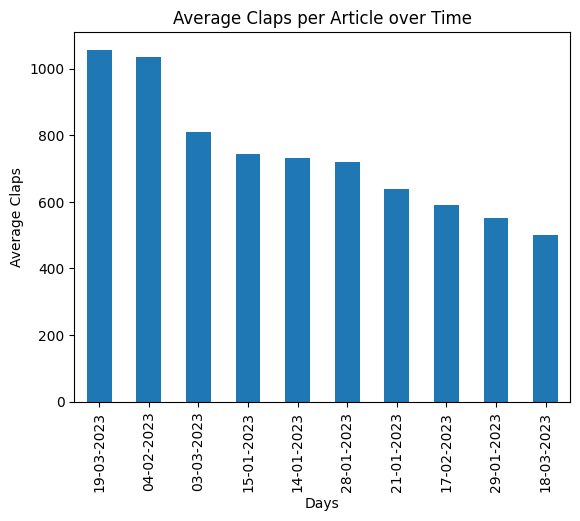

In [ ]:
# group data by day and calculate average claps, taken only 10 most averaged mean per day for visuals 
df_days = df.groupby('date')['claps'].mean().sort_values(ascending=False)[:10]
df_days

# create line plot of average claps per article over time
df_days.plot(kind='bar')
plt.title('Average Claps per Article over Time')
plt.xlabel('Days')
plt.ylabel('Average Claps')
plt.show()

Scatter plot to show the relationship between mean claps per article in a day

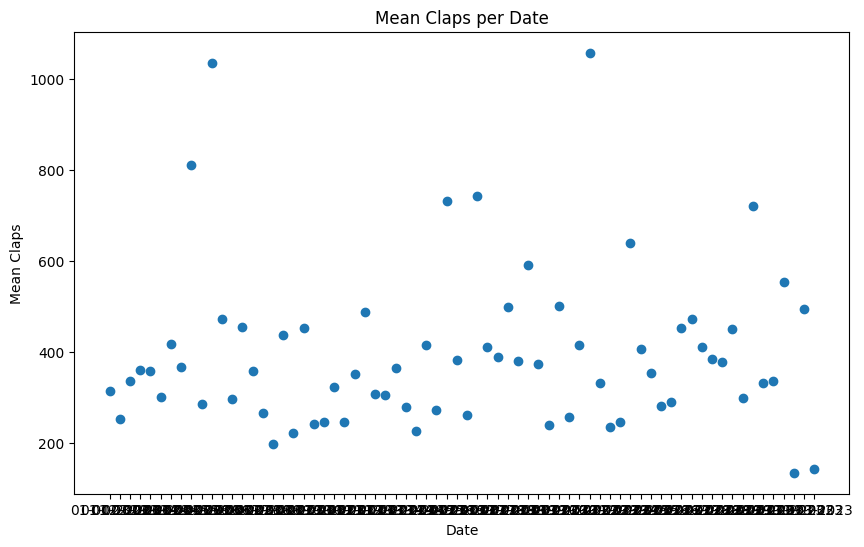

In [ ]:
df_days = df.groupby('date')['claps'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_days.index, df_days.values)
ax.set_xlabel('Date')
ax.set_ylabel('Mean Claps')
ax.set_title('Mean Claps per Date')
plt.show()

In [ ]:
print(df['date'].min())
print(df['date'].max())

01-01-2023
30-03-2023


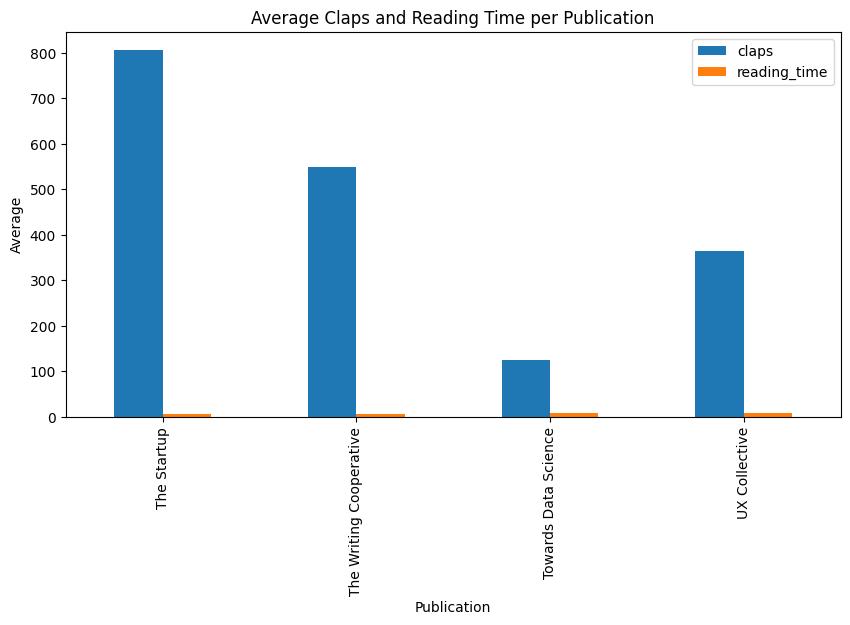

In [ ]:
# group data by publication and calculate average claps and reading time
df_publication = df.groupby('publication').agg({'claps': 'mean', 'reading_time': 'mean'})

# A bar chart of average claps and reading time per publication to show which publication people enjoy/appreciate the most
df_publication.plot(kind='bar', figsize=(10,5))
plt.title('Average Claps and Reading Time per Publication')
plt.xlabel('Publication')
plt.ylabel('Average')
plt.show()

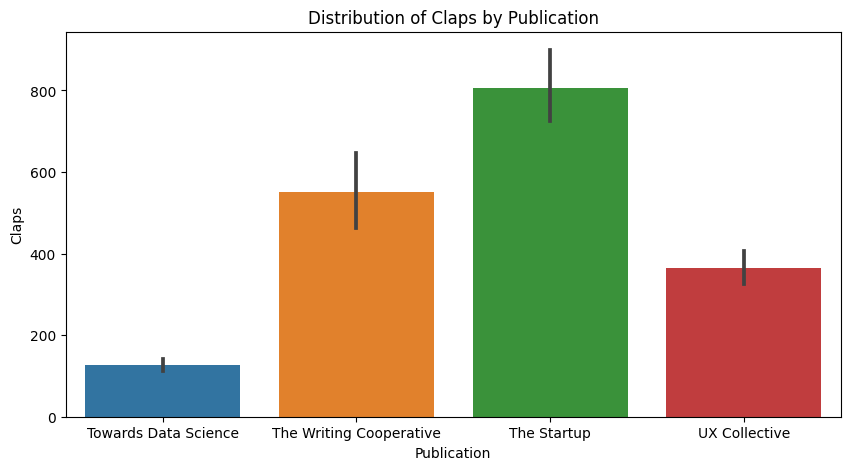

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='publication', y='claps', data=df)
plt.title('Distribution of Claps by Publication')
plt.xlabel('Publication')
plt.ylabel('Claps')
plt.show()

From the distribution its clear that The Startup is the publication which received the most mean claps

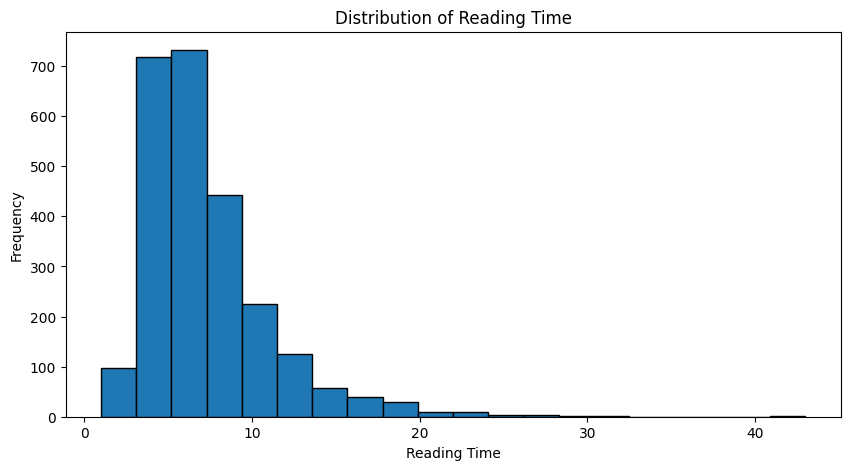

In [ ]:
plt.figure(figsize=(10,5))
df['reading_time'].plot(kind='hist', bins=20,ec = 'black')
plt.title('Distribution of Reading Time')
plt.xlabel('Reading Time')
plt.ylabel('Frequency')
plt.show()

Most articles have reading time of less than 20 minutes 

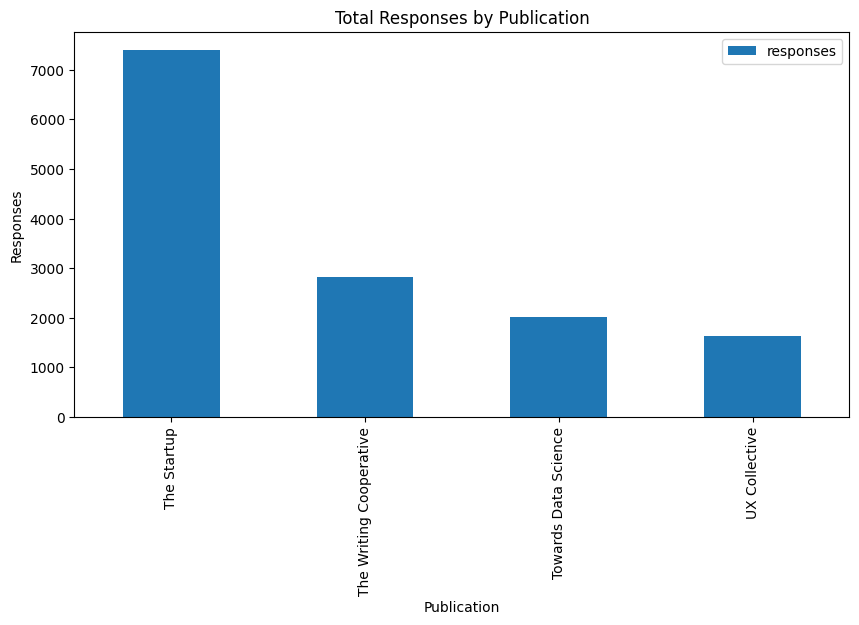

In [ ]:
df_publication = df.groupby('publication').agg({'responses': 'sum'})

df_publication.plot(kind='bar', figsize=(10,5))
plt.title('Total Responses by Publication')
plt.xlabel('Publication')
plt.ylabel('Responses')
plt.show()

The Startup is the publication which got the most responses 

# 4. Feature Engineering: 
## Creating new features from existing columns to extract additional insights from the data.

In [ ]:
df['title_len'] = df['title'].apply(len)
df['subtitle_len'] = df['subtitle'].fillna('').apply(len)
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()
df['claps_per_minute'] = df['claps'] / df['reading_time']
df['response_rate'] = df['responses'] / df['claps']

In [ ]:
df

,id,url,title,subtitle,claps,responses,reading_time,publication,date,title_len,subtitle_len,day_of_week,claps_per_minute,response_rate
826,827,https://towardsdatascience.com/graph-ml-in-202...,Graph ML in 2023: The State of Affairs,Hot trends and major…,842.0,4,26,Towards Data Science,01-01-2023,38,21,Sunday,32.384615,0.004751
840,841,https://writingcooperative.com/4-ways-in-which...,4 Ways In Which Returning To Writing After Bre...,Pauses — circumstantial or deliberate…,224.0,1,5,The Writing Cooperative,01-01-2023,63,38,Sunday,44.800000,0.004464
839,840,https://writingcooperative.com/when-the-writer...,When The Writers You Don’t Admire Get You Down,"It’s all too easy to become resentful, but don’t",151.0,1,7,The Writing Cooperative,01-01-2023,46,48,Sunday,21.571429,0.006623
838,839,https://writingcooperative.com/how-writing-is-...,How Writing Is Like Baking Bread,"As the holidays approach, there has been a lot...",228.0,1,6,The Writing Cooperative,01-01-2023,32,69,Sunday,38.000000,0.004386
836,837,https://medium.com/swlh/5-underrated-tips-nobo...,5 Underrated Tips Nobody Talks About Content C...,#4 Your content’s quality is not defined by the…,435.0,9,4,The Startup,01-01-2023,53,48,Sunday,108.750000,0.020690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,43,https://writingcooperative.com/selling-your-se...,Selling Your Self-Published Novel is All About...,NaN,22.0,0,7,The Writing Cooperative,30-03-2023,60,0,Thursday,3.142857,0.000000
43,44,https://writingcooperative.com/how-to-write-be...,How to Write Better Character Description,Simple Tips That Any Writer Can Apply,57.0,2,5,The Writing Cooperative,30-03-2023,41,37,Thursday,11.400000,0.035088
35,36,https://towardsdatascience.com/maintaining-the...,Maintaining the Quality of Your Feature Store,The fundamentals of feature stores and a few t...,67.0,0,5,Towards Data Science,30-03-2023,45,57,Thursday,13.400000,0.000000
39,40,https://medium.com/swlh/how-i-built-online-inc...,How I Built Online Income Streams Alongside My...,"And how you can, too.",475.0,8,4,The Startup,30-03-2023,50,21,Thursday,118.750000,0.016842


below is a scatter plot to show the relationship between the length of the article's title and subtitle, respectively, and the number of claps the article received

<Axes: xlabel='title_len', ylabel='claps'>

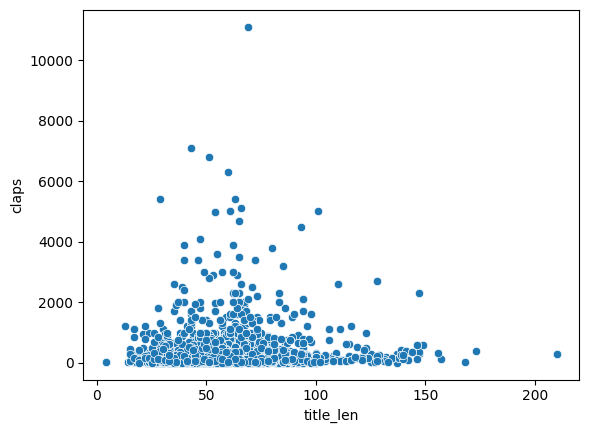

In [ ]:
sns.scatterplot(x='title_len', y='claps', data=df)
#sns.scatterplot(x='subtitle_len', y='claps', data=df)

Titles length of more than 100 received less claps in comparison with those artcicles that have short titles length 

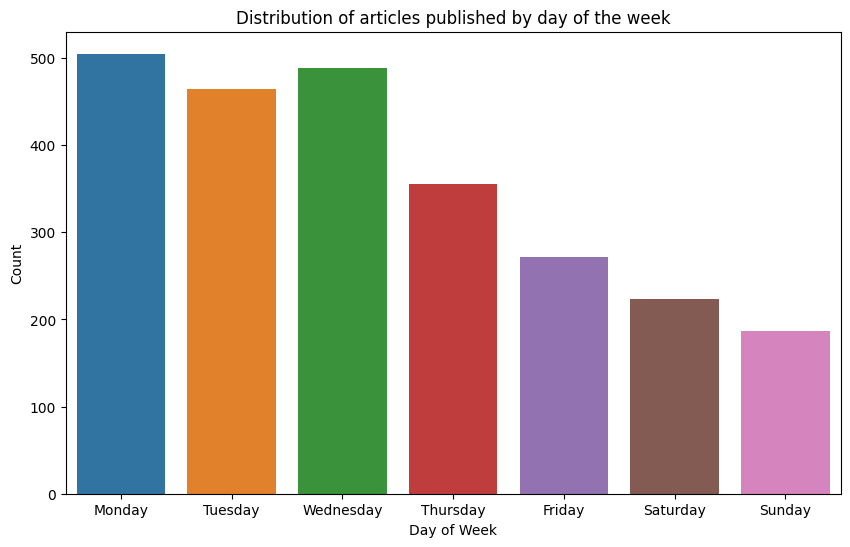

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of articles published by day of the week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

\Most articles are published on Mondays and very less on Sundays which is not a surprise given that most people don't work on weekends (Saturdays & sundays)

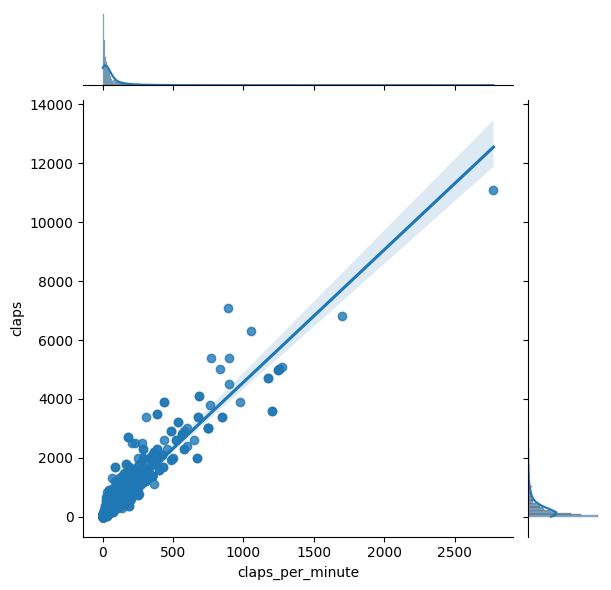

In [ ]:
sns.jointplot(x='claps_per_minute', y='claps', data=df, kind='reg')

a scatter plot to show the relationship between the average number of claps per minute of reading time and the number of claps the article received, along with a regression line to indicate the direction of the relationship

<Axes: xlabel='claps', ylabel='response_rate'>

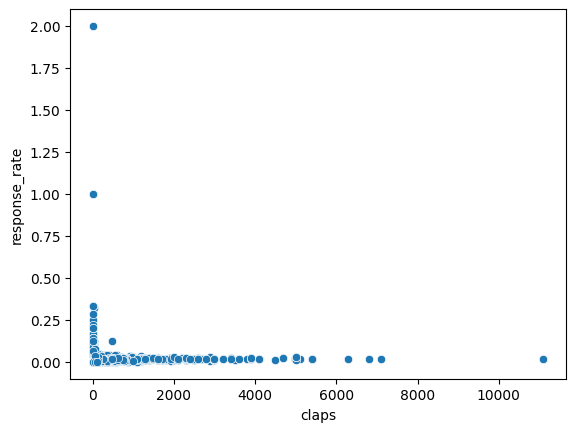

In [ ]:
sns.scatterplot(y='response_rate', x='claps', data=df)

a boxplot to show the relationship between the response rate and the number of claps the article received.
seems like majority of the people who did clap don't end up responding to the article

Out of curiosity let take a look at those two high points that received more responses than claps

In [ ]:
df[['title', 'subtitle', 'publication','response_rate']].sort_values(by = 'response_rate', ascending=False)[:2]

,title,subtitle,publication,response_rate
433,"<strong class=""markup--strong markup--h3-stron...","<strong class=""markup--strong markup--h4-stron...",Towards Data Science,2.0
1137,Diffusion Probabilistic Models and Text-to-Ima...,Photorealistic Generation of Anything You…,Towards Data Science,1.0


Both of them are from Towards Data Science publication and most probably both arcticles were so contradicting 

# Text Analysis 

## Performed some text analysis on title and subtitle to determine sentiment analysis 

Sentiment analysis is a type of natural language processing that aims to determine the overall emotional tone of a piece of text. In the context of analyzing the title and subtitle of articles, sentiment analysis can be used to determine whether the overall sentiment of an article is positive, negative, or neutral.

There are various libraries available in Python that can be used for sentiment analysis, such as NLTK, TextBlob, and VADER. These libraries use different approaches to determine sentiment, such as rule-based analysis, machine learning, or a combination of both.

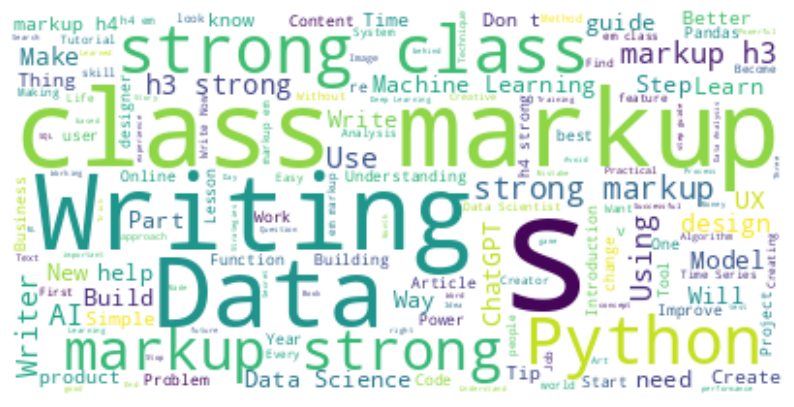

In [ ]:
# Combine title and subtitle into one string
text = ' '.join(df['title'].fillna('') + ' ' + df['subtitle'].fillna(''))

# Generate a word cloud
wordcloud = WordCloud(background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# below are words that appear the most in most of the articles

In [ ]:
# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize text into words
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    # Remove non-alphabetic characters
    words = [word for word in words if word.isalpha()]
    # Convert words to lowercase
    words = [word.lower() for word in words]
    return words

# Preprocess the text
words = preprocess_text(text)

# Get the frequency distribution of words
freq_dist = nltk.FreqDist(words)

# Print the 20 most common words
print(freq_dist.most_common(20))

[('markup', 434), ('strong', 357), ('data', 345), ('writing', 223), ('using', 203), ('python', 197), ('learning', 190), ('ai', 164), ('guide', 151), ('design', 146), ('use', 140), ('write', 123), ('ux', 117), ('chatgpt', 107), ('make', 103), ('machine', 101), ('time', 97), ('part', 96), ('models', 89), ('writers', 82)]


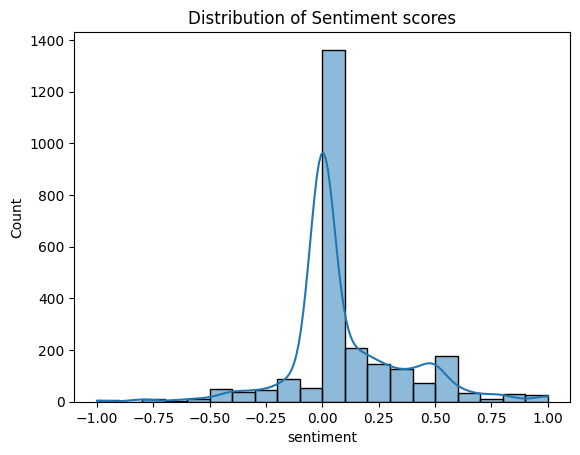

In [ ]:
from textblob import TextBlob

# Define a function to get the sentiment of text
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Get the sentiment of each article's title and subtitle
df['sentiment'] = df['title'].fillna('') + ' ' + df['subtitle'].fillna('')
df['sentiment'] = df['sentiment'].apply(get_sentiment)

# Plot the distribution of sentiment scores
sns.histplot(data=df, x='sentiment', bins=20, kde=True)
plt.title('Distribution of Sentiment scores')
plt.show()

Claps vs Sentiment: we can plot a scatter plot to see the relationship between the number of claps an article receives and its sentiment score.

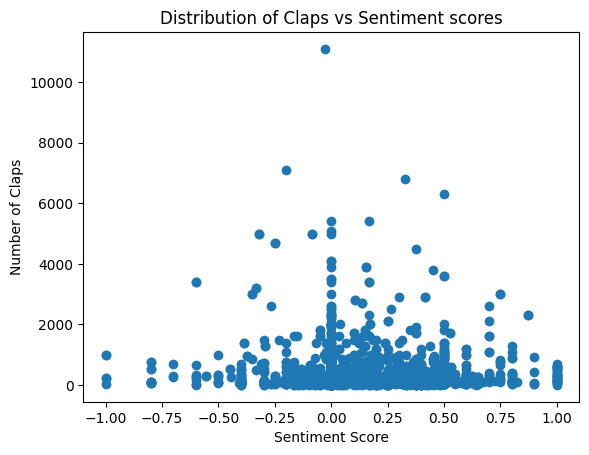

In [ ]:
plt.scatter(df['sentiment'], df['claps'])
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Claps')
plt.title('Distribution of Claps vs Sentiment scores')
plt.show()

It shows that articles with a more positive sentiment tend to receive more claps

Reading Time vs Sentiment: Similarly, we can plot a scatter plot to see the relationship between the reading time of an article and its sentiment score

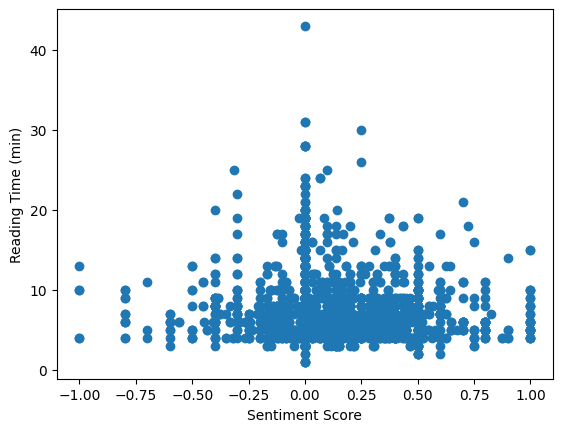

In [ ]:
plt.scatter(df['sentiment'], df['reading_time'])
plt.xlabel('Sentiment Score')
plt.ylabel('Reading Time (min)')
plt.show()

we can see that articles with a more positive sentiment tend to have longer reading times

Responses vs Sentiment: We can also plot a scatter plot to see the relationship between the number of responses an article receives and its sentiment score.

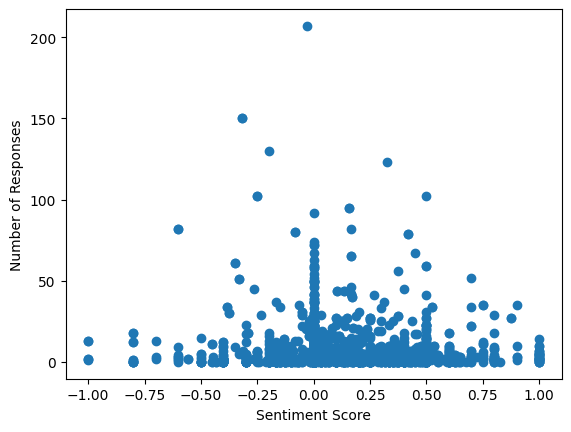

In [ ]:
plt.scatter(df['sentiment'], df['responses'])
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Responses')
plt.show()

Here as well articles with a more positive sentiment tend to receive more responses

# Time series analysis

since we have a date column so why not? but first what is Time series analysis

Time series analysis is a powerful technique for understanding how data changes over time. There are many different approaches to time series analysis, but some common steps include:

Visualize the data: Before diving into more complex analysis, it's always a good idea to start by visualizing the data. This can help you get a sense of any trends, patterns, or anomalies in the data. Line plots, scatter plots, and histograms are all useful tools for visualizing time series data.

Test for stationarity: Stationarity is a key assumption in many time series models. A time series is said to be stationary if its statistical properties (such as mean and variance) do not change over time. There are several statistical tests for stationarity, such as the Augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.

Transform the data: If the data is not stationary, you may need to apply a transformation to make it stationary. Common transformations include differencing, log transformation, and seasonal adjustment.

Choose a model: Once the data is stationary, you can begin to fit a time series model. There are many different types of time series models, including autoregressive (AR), moving average (MA), and autoregressive integrated moving average (ARIMA) models.

Evaluate the model: After fitting a model, it's important to evaluate its performance. Common metrics for evaluating time series models include root mean squared error (RMSE), mean absolute error (MAE), and mean absolute percentage error (MAPE).

In [ ]:
print(df['date'].min())
print(df['date'].max())

01-01-2023
30-03-2023


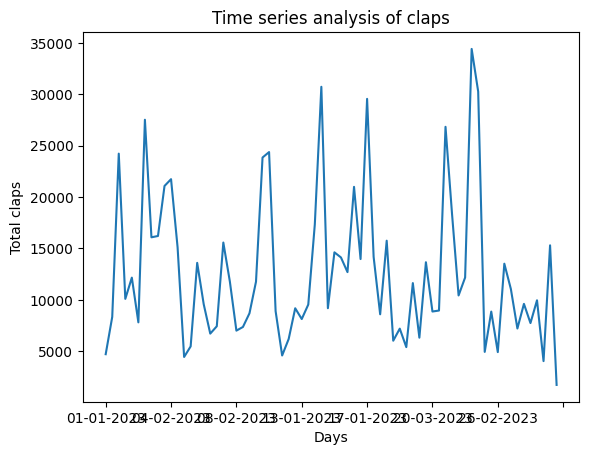

In [ ]:
#use the days as we only have 3 months in our dataset
grouped_data = df.groupby('date')['claps'].sum()
grouped_data.plot()
plt.title('Time series analysis of claps')
plt.ylabel('Total claps')
plt.xlabel('Days')
plt.show()

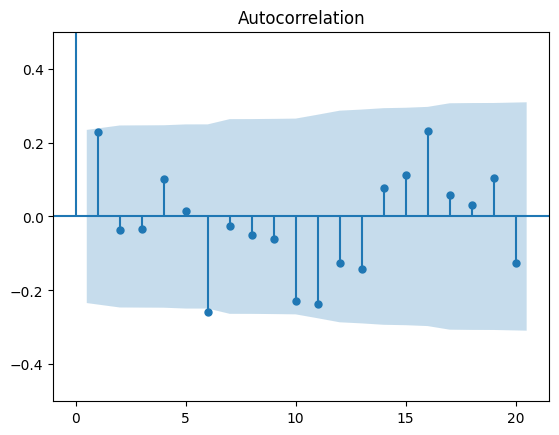

In [ ]:
plot_acf(grouped_data, lags=20, zero=True)
plt.ylim([-0.5,0.5])
plt.show()

as we can see all the lags except zero lag are within the confidence interval therefore our time series data have no correlation and its a good indicator that we are dealing with stationary time series

In [ ]:
# Perform the ADF test on the 'claps' column to determine stationarity
result = adfuller(grouped_data)

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -6.378726287477115
p-value: 2.249853539389925e-08


Interpretation:

The p-value for the ADF test is calculated correctly as 2.249853539389925e-08 which is much less than a significant value of 0.05. This indicates that there is strong evidence that the series is stationary. (null hypothesis says that if the p-value is less than 0.05 then the time series is stationary) 

In [ ]:
# Fit an ARIMA(1,1,1) model to the 'claps' time series
model = ARIMA(df['claps'], order=(1,0,1))
results = model.fit()

# Print a summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  claps   No. Observations:                 2498
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -19211.878
Date:                Tue, 25 Apr 2023   AIC                          38431.755
Time:                        14:13:42   BIC                          38455.048
Sample:                             0   HQIC                         38440.212
                               - 2498                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        367.3533     28.039     13.102      0.000     312.398     422.309
ar.L1          0.2900      0.145      2.003      0.045       0.006       0.574
ma.L1         -0.1513      0.147     -1.030      0.3

<Axes: xlabel='date'>

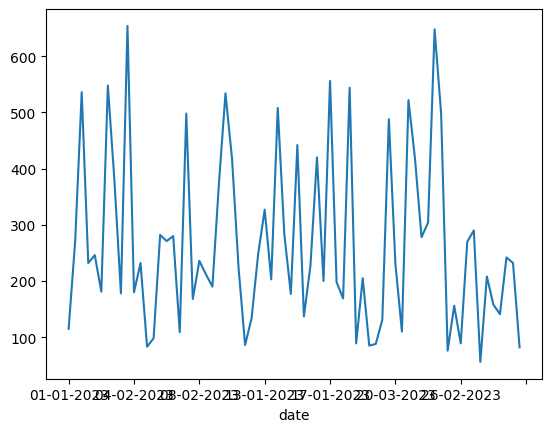

In [ ]:
grouped_data = df.groupby('date')['reading_time'].sum()
grouped_data.plot()

In [ ]:
# Perform the ADF test on the 'claps' column
result = adfuller(grouped_data)

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -8.134879500368072
p-value: 1.0658263977309596e-12


In [ ]:
# Fit an ARIMA(1,1,1) model to the 'claps' time series
model = ARIMA(df['claps'], order=(1,1,1))
results = model.fit()

# Print a summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  claps   No. Observations:                 2498
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -19208.472
Date:                Tue, 25 Apr 2023   AIC                          38422.944
Time:                        14:13:45   BIC                          38440.412
Sample:                             0   HQIC                         38429.286
                               - 2498                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1424      0.010     14.978      0.000       0.124       0.161
ma.L1         -1.0000      0.339     -2.947      0.003      -1.665      -0.335
sigma2      4.515e+05   1.52e+05      2.980      0.0

given the number of months are just 3 then time series forecasting might need more data for predictions (I'm talking about months) to predict the proper parameter for ARIMA models (p,d,q) which will be the pivotal part in determining the time series forecasting

Let's Try a Simple Linear Regression on our Model

In [ ]:
df

,id,url,title,subtitle,claps,responses,reading_time,publication,date,title_len,subtitle_len,day_of_week,claps_per_minute,response_rate,sentiment
826,827,https://towardsdatascience.com/graph-ml-in-202...,Graph ML in 2023: The State of Affairs,Hot trends and major…,842.0,4,26,Towards Data Science,01-01-2023,38,21,Sunday,32.384615,0.004751,0.250000
840,841,https://writingcooperative.com/4-ways-in-which...,4 Ways In Which Returning To Writing After Bre...,Pauses — circumstantial or deliberate…,224.0,1,5,The Writing Cooperative,01-01-2023,63,38,Sunday,44.800000,0.004464,0.300000
839,840,https://writingcooperative.com/when-the-writer...,When The Writers You Don’t Admire Get You Down,"It’s all too easy to become resentful, but don’t",151.0,1,7,The Writing Cooperative,01-01-2023,46,48,Sunday,21.571429,0.006623,0.138889
838,839,https://writingcooperative.com/how-writing-is-...,How Writing Is Like Baking Bread,"As the holidays approach, there has been a lot...",228.0,1,6,The Writing Cooperative,01-01-2023,32,69,Sunday,38.000000,0.004386,0.000000
836,837,https://medium.com/swlh/5-underrated-tips-nobo...,5 Underrated Tips Nobody Talks About Content C...,#4 Your content’s quality is not defined by the…,435.0,9,4,The Startup,01-01-2023,53,48,Sunday,108.750000,0.020690,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,43,https://writingcooperative.com/selling-your-se...,Selling Your Self-Published Novel is All About...,NaN,22.0,0,7,The Writing Cooperative,30-03-2023,60,0,Thursday,3.142857,0.000000,0.000000
43,44,https://writingcooperative.com/how-to-write-be...,How to Write Better Character Description,Simple Tips That Any Writer Can Apply,57.0,2,5,The Writing Cooperative,30-03-2023,41,37,Thursday,11.400000,0.035088,0.250000
35,36,https://towardsdatascience.com/maintaining-the...,Maintaining the Quality of Your Feature Store,The fundamentals of feature stores and a few t...,67.0,0,5,Towards Data Science,30-03-2023,45,57,Thursday,13.400000,0.000000,-0.200000
39,40,https://medium.com/swlh/how-i-built-online-inc...,How I Built Online Income Streams Alongside My...,"And how you can, too.",475.0,8,4,The Startup,30-03-2023,50,21,Thursday,118.750000,0.016842,0.000000


In [ ]:
corr = df.drop('id', axis=1).corr()
print(corr)

                     claps  responses  reading_time     title_len  \
claps             1.000000   0.944147     -0.134700  5.187810e-02   
responses         0.944147   1.000000     -0.129232  5.404665e-02   
reading_time     -0.134700  -0.129232      1.000000  4.240618e-02   
title_len         0.051878   0.054047      0.042406  1.000000e+00   
subtitle_len     -0.067718  -0.052869      0.032114 -3.723141e-01   
claps_per_minute  0.946598   0.908755     -0.234570  4.868125e-02   
response_rate    -0.026682   0.027893      0.010229  9.663715e-03   
sentiment         0.015656  -0.009397     -0.069615  2.173225e-07   

                  subtitle_len  claps_per_minute  response_rate     sentiment  
claps                -0.067718          0.946598      -0.026682  1.565632e-02  
responses            -0.052869          0.908755       0.027893 -9.397109e-03  
reading_time          0.032114         -0.234570       0.010229 -6.961506e-02  
title_len            -0.372314          0.048681       0.0

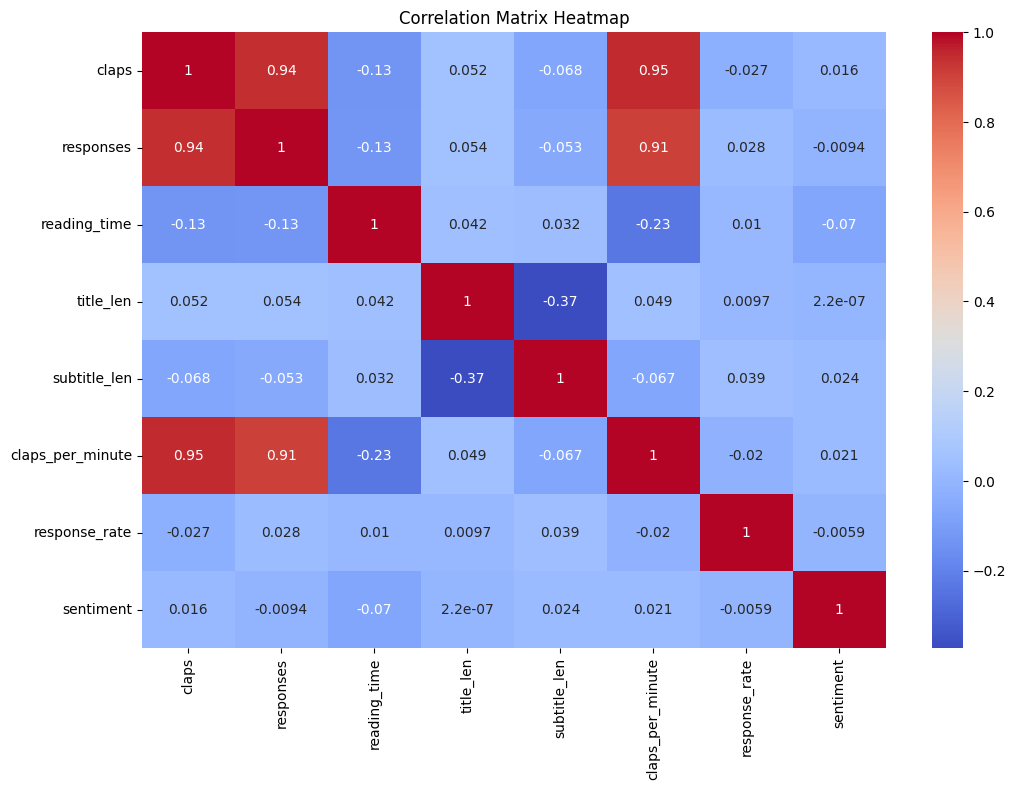

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
pred = df[['responses','claps']]
pred

,responses,claps
826,4,842.0
840,1,224.0
839,1,151.0
838,1,228.0
836,9,435.0
...,...,...
42,0,22.0
43,2,57.0
35,0,67.0
39,8,475.0


In [ ]:
# Create the predictor variables matrix X and the response variable y
X = pred['claps'].fillna(0)
y = pred['responses'].fillna(0)

# Add a constant to the predictor variables matrix X
X1 = sm.add_constant(X)

# Fit a linear regression model using OLS
model = sm.OLS(y, X1)
results = model.fit()

# Print a summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              responses   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 2.059e+04
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:28:14   Log-Likelihood:                -7132.5
No. Observations:                2498   AIC:                         1.427e+04
Df Residuals:                    2496   BIC:                         1.428e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8666      0.095     -9.094      0.0

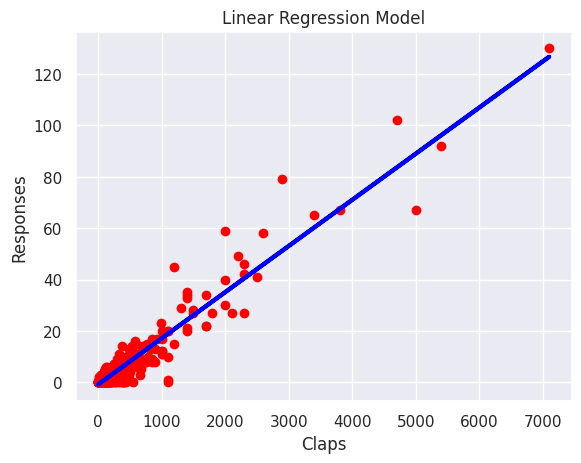

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pred['claps'].fillna(0), pred['responses'].fillna(0), test_size=0.2, random_state=42)

# Train the linear regression model using the training set
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Plot the linear regression line
sns.set()
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, lr.predict(X_test.values.reshape(-1, 1)), color='blue', linewidth=3)
plt.xlabel('Claps')
plt.ylabel('Responses')
plt.title('Linear Regression Model')
plt.show()

y_pred = lr.predict(X_test.values.reshape(-1, 1))

In short we try to approximate a linear function  𝑓(𝑥)=𝑎𝑥+𝑏
  that fits the data points  (𝑥𝑖,𝑦𝑖)
 . It can be realized by the method of least squares, which minimizes the sum of the squares of the differences between the target values  𝑦𝑖
  and the values predicted by the linear function  𝑓(𝑥𝑖)
 . The equations are: a =(∑(𝑥𝑖−𝑥¯)(𝑦𝑖−𝑦¯)/∑(𝑥𝑖−𝑥¯)**2)b =  𝑦¯−𝑎𝑥¯
 
where  𝑥¯
  and  𝑦¯
  are the mean values of  𝑥
  and  𝑦
  respectively.

In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    x_mean = np.mean(x)
    y_mean = np.mean(y)
  
    # calculating Numerator and Denominator
    num = np.sum((x - x_mean)*(y - y_mean))
    denom = np.sum((x - x_mean)**2)
  
    # calculating regression coefficients
    a = num / denom
    b = y_mean - a*x_mean
  
    return (b, a)

In [ ]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

In [ ]:
b, a = estimate_coef(X_train, y_train.values)

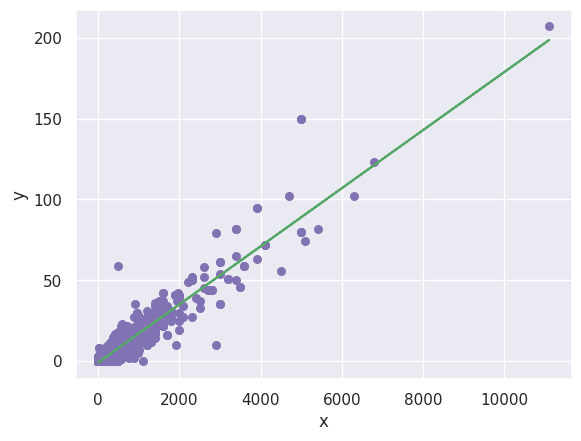

In [ ]:
plot_regression_line(X_train, y_train.values, (b, a))

In [ ]:
print("Estimated coefficients:\nb = {}  a = {}".format(b, a))

Estimated coefficients:
b = -0.8527418083858489  a = 0.017970093645500604


In [ ]:
print('Estimated intercept coefficient: {}'.format(lr.intercept_))
print('Estimated linear coefficients: {}'.format(lr.coef_))

Estimated intercept coefficient: [-0.85274181]
Estimated linear coefficients: [[0.01797009]]


In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1998,)
X_test shape:  (500,)
y_train shape:  (1998,)
y_test shape:  (500,)


In [ ]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(regr.score(X_test, y_test))

0.9116892148335078


In [ ]:
y_pred = regr.predict(X_test)
print('R2 score: ', r2_score(y_test, y_pred))
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Root mean squared error: ', mean_squared_error(y_test, y_pred, squared=False))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))

R2 score:  0.9116892148335078
Mean squared error:  14.38988036866071
Root mean squared error:  3.7933995793563207
Mean absolute error:  2.212913663127375


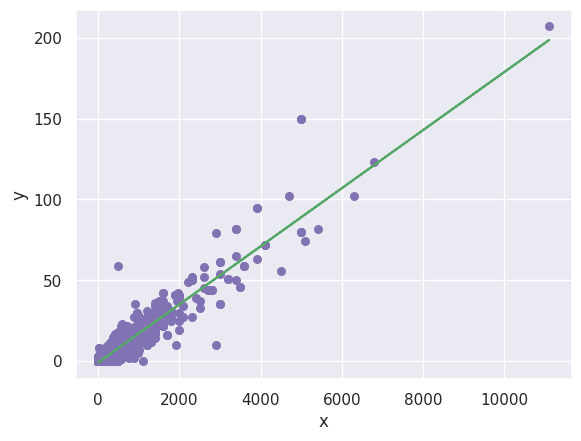

In [ ]:
plot_regression_line(X_train, y_train, (regr.intercept_, regr.coef_))

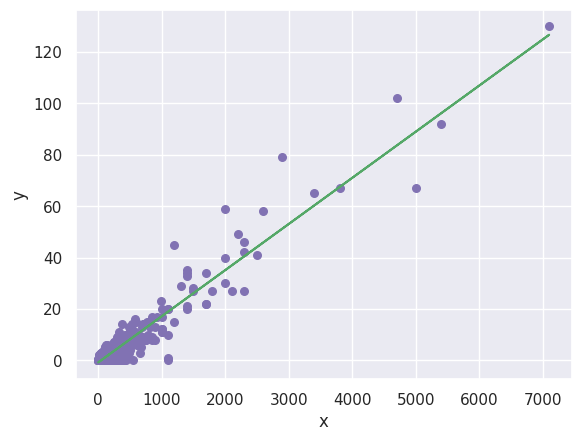

In [ ]:
plot_regression_line(X_test, y_test, (regr.intercept_, regr.coef_))

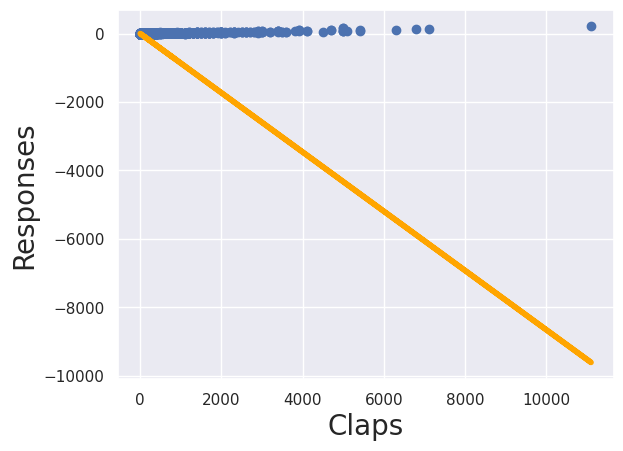

In [ ]:
plt.scatter(X,y)
yhat = -0.866*X + 0.0180
fig = plt.plot(X,yhat, lw=4, c = 'orange', label = 'regression line')
plt.xlabel('Claps', fontsize = 20)
plt.ylabel('Responses', fontsize = 20)
plt.show()

since the slope is negative then making predictions become harder and harder